---
<h1 align='center' style="color:blue">Mutual Information Feature Selection</h1>

---

#### Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

#### Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

#### The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the **mutual_info_classif() function.**



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# load dataset
# create function for load dataset
def load_dataset(filename):
    # load dataset as a pandas fataframe
    data=pd.read_csv(filename,header=None)
    
    # retrieve numpy  array
    dataset=data.values
    
    # Split into Input(X) and output(y) variables
    X=dataset[:,:-1]
    y=dataset[:,-1]
    
    # format all fileds as string
    X=X.astype(str)
    return X,y

# prepare input data
def prepare_inputs(X_train,X_test):
    oe=OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc=oe.transform(X_train)
    X_test_enc=oe.transform(X_test)
    return X_train_enc,X_test_enc


# Prepare target
def prepare_targets(y_train,y_test):
    le=LabelEncoder()
    le.fit(y_train)
    y_train_enc=le.transform(y_train)
    y_test_enc=le.transform(y_test)
    return y_train_enc,y_test_enc

# load the dataset
X, y = load_dataset('data/breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#### Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).

In [3]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

#### We can perform feature selection using mutual information on the breast cancer set and print and plot the scores (larger is better) as we did in the previous section.

#### The complete example of using mutual information for categorical feature selection is listed below.

Feature 0: 0.000000
Feature 1: 0.005979
Feature 2: 0.051078
Feature 3: 0.004170
Feature 4: 0.063461
Feature 5: 0.075712
Feature 6: 0.009558
Feature 7: 0.000000
Feature 8: 0.009749


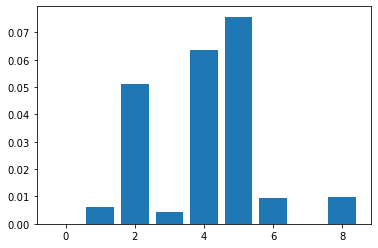

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
# load dataset
# create function for load dataset
def load_dataset(filename):
    # load dataset as a pandas fataframe
    data=pd.read_csv(filename,header=None)
    
    # retrieve numpy  array
    dataset=data.values
    
    # Split into Input(X) and output(y) variables
    X=dataset[:,:-1]
    y=dataset[:,-1]
    
    # format all fileds as string
    X=X.astype(str)
    return X,y

# prepare input data
def prepare_inputs(X_train,X_test):
    oe=OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc=oe.transform(X_train)
    X_test_enc=oe.transform(X_test)
    return X_train_enc,X_test_enc


# Prepare target
def prepare_targets(y_train,y_test):
    le=LabelEncoder()
    le.fit(y_train)
    y_train_enc=le.transform(y_train)
    y_test_enc=le.transform(y_test)
    return y_train_enc,y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('data/breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### Running the example first prints the scores calculated for each input feature and the target variable.

#### **Note:** your specific results may differ. Try running the example a few times.

#### In this case, we can see that some of the features have a very low score, suggesting that perhaps they can be removed.

#### Perhaps features 3, 6, 2, and 5 are most relevant.

#### A bar chart of the feature importance scores for each input feature is created.

#### Importantly, a different mixture of features is promoted.

#### Now that we know how to perform feature selection on categorical data for a classification predictive modeling problem, we can try developing a model using the selected features and compare the results.